Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1iTu5C3V7-Gd2NJfCRHt6zLYIyRTm6ICv?usp=sharing

##Day 2

Rabu, 11 Oktober 2023

#Study Case Credit Risk Analysis


In [56]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#load data to colab
path= '/content/drive/MyDrive/DataSource/credit_risk_1.csv'

load_data=pd.read_csv(path)
load_data

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [59]:
#membuat data frame
df=pd.DataFrame(load_data)
df.tail()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0
699,699,37,1,12,14,44,14.7,2.994684,3.473316,0.0


## Busines Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman.

Pemberi pinjaman biasanya membuat dua jenis keputusan: pertama, apakah akan memberikan kredit kepada pemohon baru, dan kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka. Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya.

Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.


Goal:
1. Prediksi Potensi Nasabah Gagal Bayar<br>
Problem: Klasifikasi<br>
Kemungkinan Algoritma:<br>
a. Decision Tree <br>
b. Random Forest <br>
c. SVM <br>
d. XGboost Tree Clasification <br>

2. Predictive nilai kredit yang akan diberikan kepada nasabah lama (Old nasabah)
Problem: Estimasi

##Data Description

There are 9 attributes containing 850 customer records followed by:

age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal) **variabel target**

##Study Case 1 : Prediksi Potensi Nasabah Gagal Bayar<br>
Problem: Klasifikasi<br>
Kemungkinan Algoritma:<br>
a. Decision Tree <br>
b. Random Forest <br>
c. SVM <br>
d. XGboost Tree Clasification <br>


In [60]:
#melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [61]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [62]:
df['age'].value_counts()

29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

<Axes: xlabel='variable', ylabel='value'>

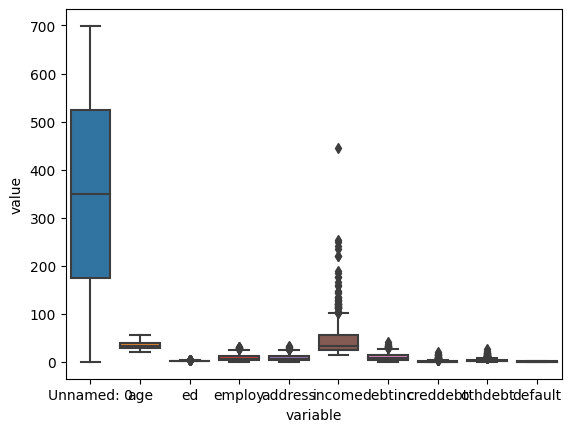

In [63]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [64]:
dfx = df.drop('Unnamed: 0', axis = 1)

<Axes: xlabel='variable', ylabel='value'>

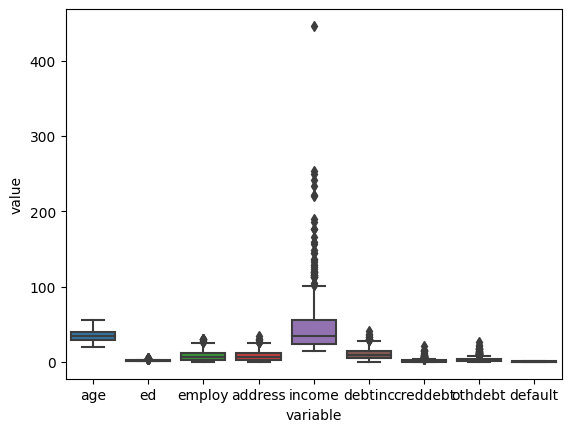

In [65]:
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx))

<Axes: xlabel='variable', ylabel='value'>

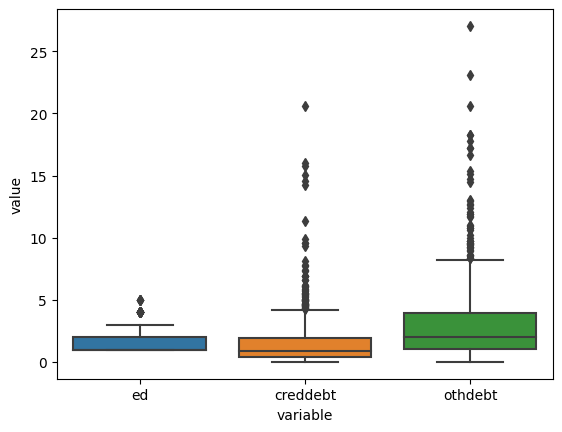

In [66]:
dfx1 = df[['ed','creddebt', 'othdebt']]
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx1))

<Axes: xlabel='variable', ylabel='value'>

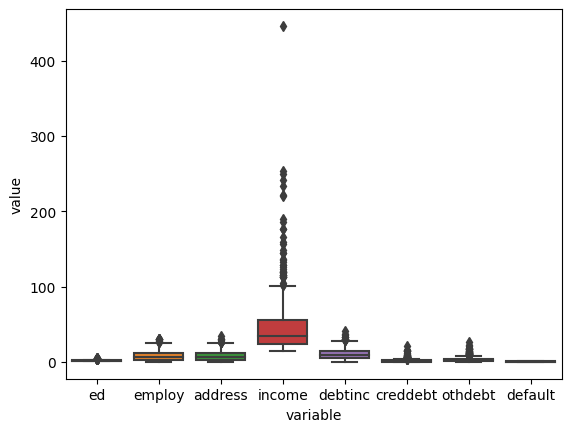

In [67]:
dfx2  = df.drop(['age', 'Unnamed: 0'], axis= 1)
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx2))

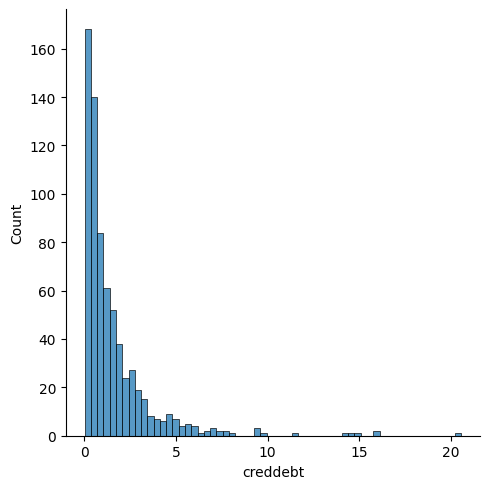

In [68]:
sns.displot(x='creddebt', data=dfx2)

<Axes: xlabel='creddebt', ylabel='ed'>

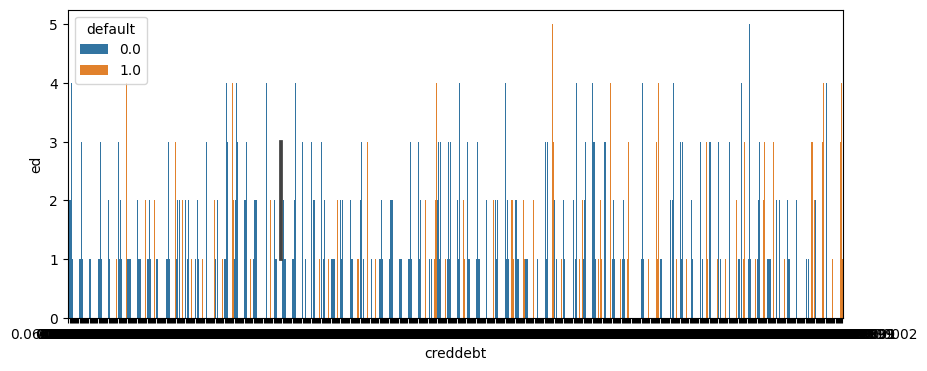

In [69]:
plt.figure(figsize=(10,4))
sns.barplot(x='creddebt', y='ed', hue='default', data=df)

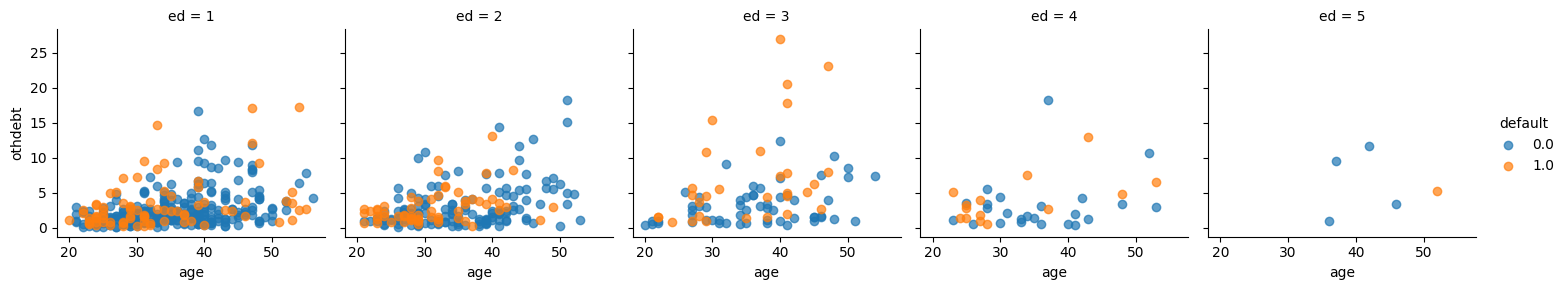

In [70]:
scatplot= sns.FacetGrid(df, col= 'ed', hue= 'default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha= .7)
scatplot.add_legend()

## Interpretasi Grafik
**Tingkat Pendidikan 1**

Pada range usia 20-30 tingkat pendidikan 1, terjadi banyak gagal bayar

**Tingkat Pendidikan 2**

Pada range usia 20-40 di level ED = 2, banyak terjadi gagal bayar

**Tingkat Pendidikan 3**

Pada range usia 30-45 di level ED = 3, banyak terjadi gagal bayar

**Tingkat Pendidikan 4**

Pada range usia 25-30 di level ED = 4, banyak terjadi gagal bayar

**Tingkat Pendidikan 5**

Pada range usia > 50 di level ED = 5, banyak terjadi gagal bayar

In [71]:
import plotly.express as px
fig = px.scatter(df, x="creddebt", y="othdebt", color="default",
                 size='income', hover_data=['age'])
fig.show()

##Data Preparation
1. Tidak ada temuan missing value
2. Hanya digunakan 1 tabel

##Data Modelling

In [72]:
#split Training and Testing
from sklearn.model_selection import train_test_split # import train_tes_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [73]:
#input variabel
x=df[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt']]

#target variabel
y=df['default'].astype('category')

In [74]:
#untuk pemodelan, kita harus membagi data training dan testing, supaya kita bisa mengikur akurasi/error predict
#karna ini supervised learning maka harus ada pembagian training dan testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [75]:
#evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

#Pemodelan Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [77]:
#object Decision Tree
clf=DecisionTreeClassifier()

#training model
model_clf=clf.fit(x_train,y_train)

#predict model
y_pred_clf=model_clf.predict(x_test)

In [78]:
#print klasifikasi
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79       155
         1.0       0.43      0.51      0.47        55

    accuracy                           0.70       210
   macro avg       0.62      0.64      0.63       210
weighted avg       0.71      0.70      0.70       210



Text(113.9222222222222, 0.5, 'Predict Label')

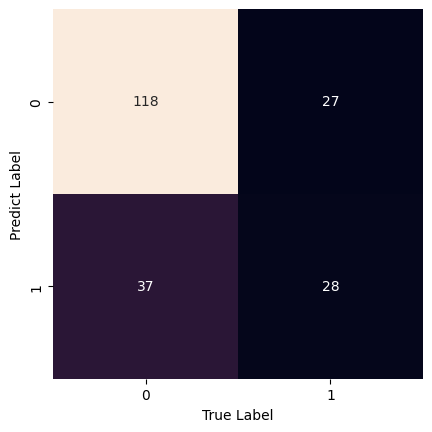

In [79]:
#memvisualisasikan confusion matrix
mat=confusion_matrix(y_test,y_pred_clf)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

##Day 3

Kamis, 12 Oktober 2023

<Axes: >

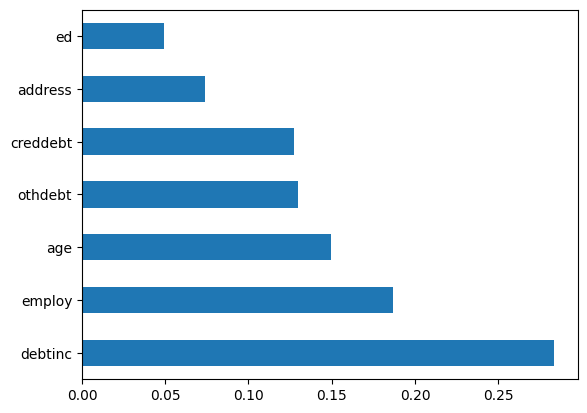

In [80]:
#siginifikan faktor dari model
feat_importances=pd.Series(model_clf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

##Hasil Evaluasi Pemodelan Decision Tree

1. Model dalam memprediksi orang yang **Tidak Gagal Bayar** akurasi sebesar 80%, sedangkan overall accuracy 66% jadi bisa disimpulkam bahwa model **UNDERFIT** dalam memprediksi orang yang TIDAK GAGAL BAYAR.
2. Model **OVERFIT** dalam mempredik Orang yang gagal bayar. Hal ini ditunjukkan nilai presisi 38% dan nilai accurasi overall 66%. Artinya presisi lebih rendah daripada accurasi (High accuracy and low presisi)
3. Berdasarkan confusion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.

##KESIMPULAN : Model menggunakan Decision Tree tidak bisa diimplementasikan pada case ini.

#Pemodelan Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [82]:
#object Random Forest
rf=RandomForestClassifier(n_estimators=200, max_depth=6)

#training model
model_rf=rf.fit(x_train,y_train)

#predict model
y_pred_rf=model_rf.predict(x_test)

In [83]:
#evaluasi model random forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.88       155
         1.0       0.81      0.38      0.52        55

    accuracy                           0.81       210
   macro avg       0.81      0.67      0.70       210
weighted avg       0.81      0.81      0.79       210



Text(113.9222222222222, 0.5, 'Predict Label')

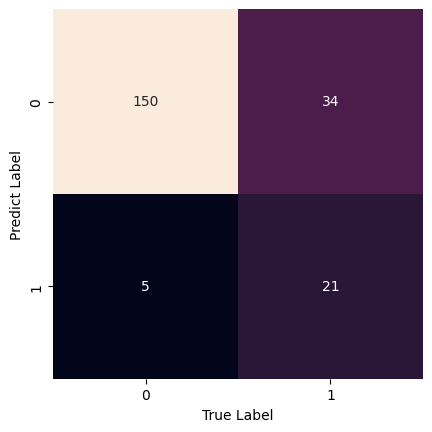

In [84]:
#memvisualisasikan confusion matrix
mat=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

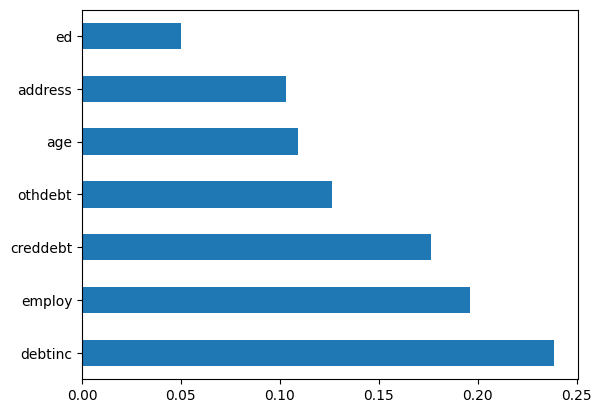

In [85]:
#siginifikan faktor dari model
feat_importances=pd.Series(model_rf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Hasil Evaluasi Pemodelan Random Forrest

1.  Model **UNDERFIT** dalam mempredik orang yang **Tidak Gagal Bayar** akurasi sebesar 80%, sedangkan overall accuracy 76% jadi bisa disimpulkan bahwa model Underfit dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model **OVERFIT** dalam mempredik Orang yang GAGAL BAYAR. Hal ini ditunjukan nilai precisi 56% dan nilai accurasi overall 76%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.

##KESIMPULAN : Model menggunakan Decision tree tidak bisa diimplementasi pada case ini.

##Hasil evaluasi setelah tuning model dengan menambahkan Hyperparameter
1. Model dinilai tepat dalam memprediksi nilai 0 (orang yg TIDAK GAGAL BAYAR).
2. Model masih overvit dalam mempredik nilai 1 (orang yg GAGAL BAYAR).
3. Model Random Forest belum bisa diterapkan pada case ini.

#Pemodelan SVM

In [86]:
# Import SVM
from sklearn.svm import SVC

In [87]:
#object SVM
svm=SVC(kernel='linear',random_state=0)

#training model
model_svm=svm.fit(x_train,y_train)

#predict model
y_pred_svm=model_svm.predict(x_test)

In [88]:
#evaluasi model SVM
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'Predict Label')

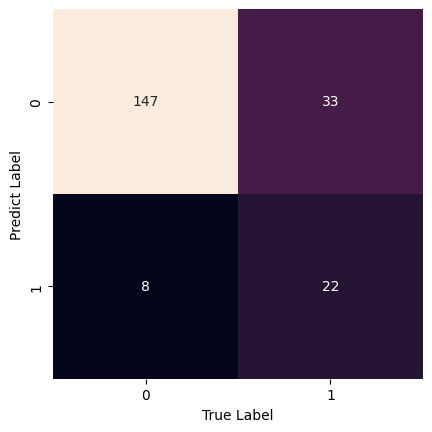

In [89]:
#memvisualisasikan confusion matrix
mat=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

## Hasil Evaluasi Pemodelan SVM

1.  Model **AKURAT** dalam mempredik orang yang **Tidak Gagal Bayar** akurasi sebesar 82%, sedangkan overall accuracy 81% jadi bisa disimpulkan bahwa model tepat dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model **OVERFIT** dalam mempredik Orang yang GAGAL BAYAR. Hal ini ditunjukan nilai precisi 73% dan nilai accurasi overall 81%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.

#Pemodelan XGBOOST

In [90]:
from xgboost import XGBClassifier

In [91]:
#object XGboost XGBClassifier
xgb=XGBClassifier()

#training model
model_xgb=xgb.fit(x_train,y_train)

#predict model
y_pred_xgb=model_xgb.predict(x_test)

In [92]:
#evaluasi model random forest
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       155
         1.0       0.60      0.44      0.51        55

    accuracy                           0.78       210
   macro avg       0.71      0.67      0.68       210
weighted avg       0.76      0.78      0.76       210



Text(113.9222222222222, 0.5, 'Predict Label')

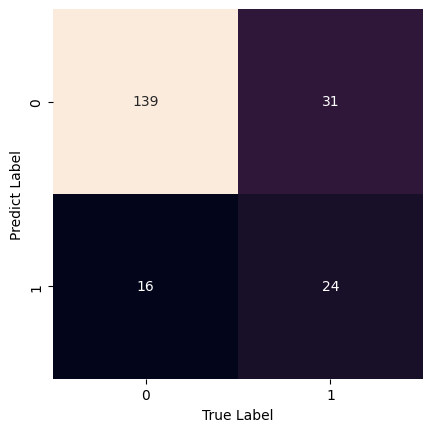

In [93]:
#memvisualisasikan confusion matrix
mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(mat.T,square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

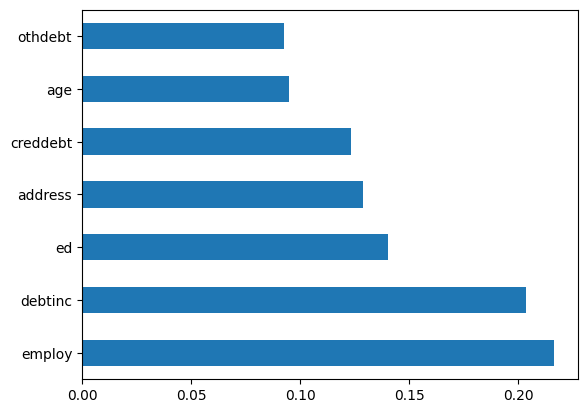

In [94]:
#siginifikan faktor dari model
feat_importances=pd.Series(model_xgb.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Hasil Evaluasi Pemodelan XGBOOST

1.  Model **UNDERFIT** dalam mempredik orang yang **Tidak Gagal Bayar** akurasi sebesar 78%, sedangkan overall accuracy 82% jadi bisa disimpulkan bahwa model tepat dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model **OVERFIT** dalam mempredik Orang yang GAGAL BAYAR. Hal ini ditunjukan nilai precisi 78% dan nilai accurasi overall 60%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.

#KESIMPULAN :

Kita akan menggunakan **model SVM** untuk implementasi mesin learning dalam memutuskan mana nasabah yg akan diterima permohonan kreditnya.

##Implementasi Machine Learning Model SVM

In [95]:
#load data new nasabah to colab
path_newNasabah= '/content/drive/MyDrive/DataSource/credit_risk_newCust.csv'

load_data_newNasabah=pd.read_csv(path_newNasabah, delimiter=",")
load_data_newNasabah

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [96]:
df_NewNasabah=pd.DataFrame(load_data_newNasabah)
df_NewNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [97]:
#input variabel
x1=df_NewNasabah[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt']]

##Applying Model SVM

In [98]:
y_predict_newNasabah=model_svm.predict(x1)
y_predict_newNasabah

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
#mengubah hasil pemodelan yg berbentuk array menjadi dataframe
df_predict_newNasabah=pd.DataFrame({'Prediction_GagalBayar':y_predict_newNasabah}).round(2)
df_predict_newNasabah

,Prediction_GagalBayar
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [100]:
#menggabungkan dataset NewNasabah dengan hasil predict nya
df_hasil_predict_svm=pd.concat([df_NewNasabah,df_predict_newNasabah], sort=False, axis=1)
df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction_GagalBayar
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [101]:
df_hasil_predict_svm['Prediction_GagalBayar'].value_counts()

0.0    127
1.0     23
Name: Prediction_GagalBayar, dtype: int64

Output: dari data new nasabah <br>
Yang akan kita terima : 127 orang <br>
Yang akan kita tolak : 23 orang

##Day 4

Kamis, 19 Oktober 2023

##Study Case 2 : Predictive nilai kredit yang akan diberikan kepada nasabah lama (Old nasabah)

**Problem:** Estimasi

**Kemungkinan algortima yang akan digunakan:**
1. Linear Regression
2. MLP Regressor (ANN)

In [102]:
#create object baru
df_oldNasabah=df
df_oldNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [103]:
#melihat info dataset
df_oldNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [104]:
#kenaikan nilai kredit diberikan kepada nasabah lama yang tidak pernah gagal bayar
df_oldNasabah1=df_oldNasabah[(df_oldNasabah['default']==0)&(df_oldNasabah['creddebt']<0.3)]
df_oldNasabah1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 7 to 693
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  115 non-null    int64  
 1   age         115 non-null    int64  
 2   ed          115 non-null    int64  
 3   employ      115 non-null    int64  
 4   address     115 non-null    int64  
 5   income      115 non-null    int64  
 6   debtinc     115 non-null    float64
 7   creddebt    115 non-null    float64
 8   othdebt     115 non-null    float64
 9   default     115 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 9.9 KB


In [105]:
df_oldNasabah1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0
...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0


<Axes: title={'center': 'Pearson Correlation'}>

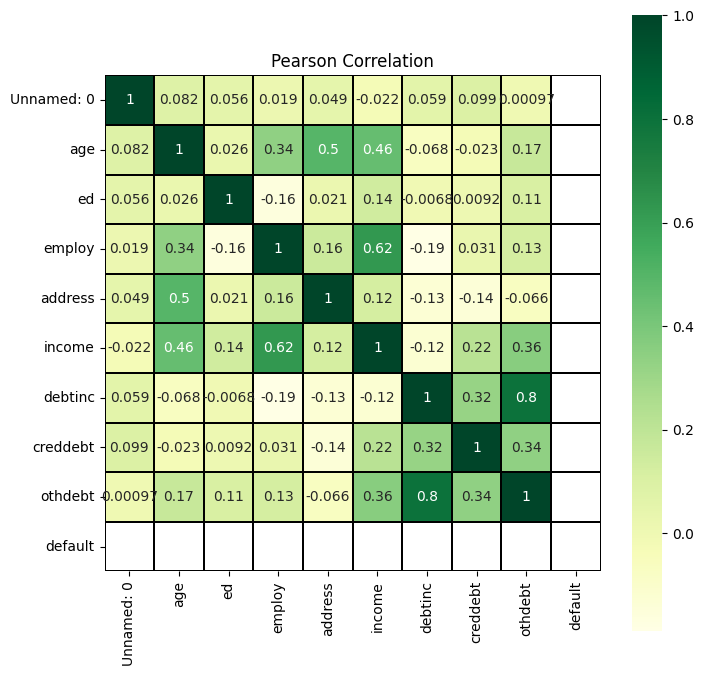

In [106]:
f, ax = plt.subplots(figsize = (8,8))
plt.title ("Pearson Correlation")
sns.heatmap(df_oldNasabah1.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap="YlGn", linecolor='black', annot=True)

In [110]:
#menentukan input variabel
x2=df_oldNasabah1[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]

#menentukan target variabel
y2=df_oldNasabah1['default']

In [111]:
#rasio Kredit terhadap Utang = Total Kredit yang Tersedia / Total Utang

#DTI = Total Utang / Pendapatan Bulanan

hutang = 176 * 9.3 / 100
kredit =(29.9 - 16.368) * hutang
print('Jadi Total Nilai Kredit Yang Dapat Diberikan =', kredit)

Jadi Total Nilai Kredit Yang Dapat Diberikan = 221.49177600000002
